In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_rows = 10

https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

- 1 – Yes
- 2 – Abstain
- 3 – No
- 8 – Absent
- 9 – Not a member

In [7]:
!cat ../datasets.md

http://www.transtats.bts.gov/Fields.asp?Table_ID=236
data/ARM.zip and http://nbviewer.ipython.org/urls/umich.box.com/shared/static/zyl08wsmxwoh6ts70v4o.ipynb


In [8]:
!open ..

In [155]:
df = pd.read_csv('../data/undata-213.tab.tsv', sep='\t',
                 parse_dates=['date'])
print('dtypes', df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024539 entries, 0 to 1024538
Data columns (total 20 columns):
rcid               1024539 non-null int64
session            1024539 non-null int64
date               1024539 non-null datetime64[ns]
unres              992822 non-null object
vote               1024539 non-null int64
ccode              1024539 non-null int64
uniquename         1024539 non-null object
voetenoldcode      1024539 non-null int64
voetenname         1024539 non-null object
voetenshortcode    1024539 non-null object
cowshortcode       1024539 non-null object
cowcode            1024539 non-null int64
cowlongname        1024539 non-null object
aclpcode           998484 non-null float64
wdicode            990090 non-null object
imfcode            973443 non-null float64
politycode         1024539 non-null int64
bankscode          977640 non-null float64
dpicode            998484 non-null object
uncode             991104 non-null float64
dtypes: datetime64[ns](1), fl

,rcid,session,date,unres,vote,ccode,uniquename,voetenoldcode,voetenname,voetenshortcode,cowshortcode,cowcode,cowlongname,aclpcode,wdicode,imfcode,politycode,bankscode,dpicode,uncode
0,3,1,1946-01-01,R/1/66,1,2,United States of America,2,United States of America,USA,USA,2,United States of America,65,USA,111,2,1220,USA,840
1,3,1,1946-01-01,R/1/66,3,20,Canada,20,Canada,CAN,CAN,20,Canada,52,CAN,156,20,180,CAN,124
2,3,1,1946-01-01,R/1/66,9,31,Bahamas,31,Bahamas,BHM,BHM,31,Bahamas,49,BHS,313,31,69,BHS,44
3,3,1,1946-01-01,R/1/66,1,40,Cuba,40,Cuba,CUB,CUB,40,Cuba,154,CUB,928,40,280,CUB,192
4,3,1,1946-01-01,R/1/66,1,41,Haiti,41,Haiti,HAI,HAI,41,Haiti,58,HTI,263,41,490,HTI,332


In [156]:
df = df[['rcid', 'session', 'date', 'unres', 'vote', 'uniquename']]

In [312]:
df = df.query("vote in (1, 3)")

In [182]:
x = df.set_index(['rcid', 'unres', 'uniquename'])

In [193]:
df['unres'] = df.unres.astype('category')
df['uniquename'] = df.uniquename.astype('category')

In [198]:
df.groupby('unres').uniquename.agg(lambda x: np.any(x == 'United States of America')).mean()

1.0

In [209]:
x = df.set_index(['rcid', 'unres', 'uniquename'])

In [313]:
y = df[['unres', 'vote', 'uniquename']].drop_duplicates()

In [314]:
y = y.set_index(['unres', 'uniquename'])
y = y.groupby(level=[0, 1]).first()

In [315]:
y.index.is_unique

True

In [316]:
us = y.xs('United States of America', level=1)

In [331]:
non_us = y.drop("United States of America", level='uniquename')

In [333]:
r = same.groupby(level='uniquename').vote.agg({'n': 'count', 'rate': 'mean'})

In [337]:
r.sort('rate')

,rate,n
uniquename,,
North Korea,0.058167,1255
Viet Nam,0.089960,2968
Angola,0.120015,2708
Seychelles,0.122525,1616
Zimbabwe,0.125528,2605
...,...,...
"Micronesia, Federated States of",0.697598,916
United Kingdom,0.711326,3523
Israel,0.756575,3270


(0, 1)

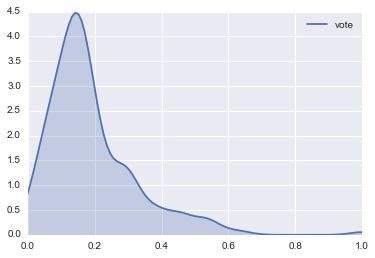

In [335]:
sns.kdeplot(rate, shade=True).set_xlim(0, 1)

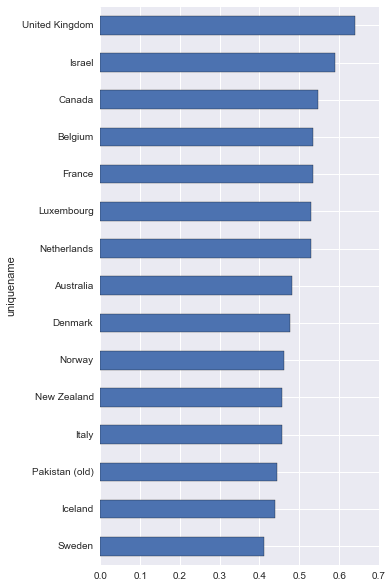

In [298]:
rate.order().drop('United States of America').tail(15).plot(kind='barh', figsize=(5, 10))

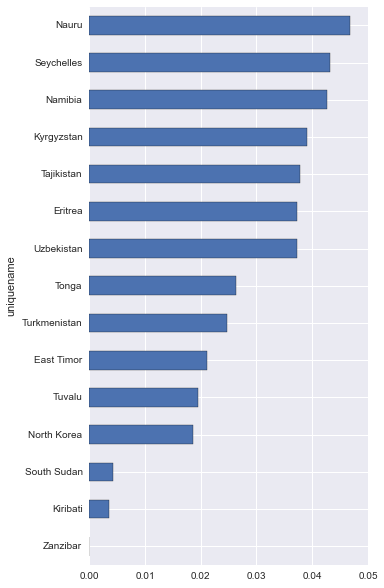

In [299]:
rate.order().drop('United States of America').head(15).plot(kind='barh', figsize=(5, 10))

In [259]:
us

unres
R/1/66       1
R/1/79       3
R/1/98       3
R/1/107      3
R/1/295      3
            ..
ESS/5/101    1
ESS/5/102    2
ESS/5/41     2
ESS/5/97     1
ESS/5/100    1
Name: vote, dtype: int64

In [239]:
usvotes = x.vote.xs('United States of America', level='uniquename')
usvotes

rcid  unres    
3     R/1/66       1
4     R/1/79       3
5     R/1/98       3
6     R/1/107      3
7     R/1/295      3
                  ..
9052  ESS/5/101    1
9053  ESS/5/102    2
9054  ESS/5/41     2
9055  ESS/5/97     1
9056  ESS/5/100    1
Name: vote, dtype: int64

session       date  vote
rcid unres     uniquename                                               
3    R/1/66    United States of America               1 1946-01-01     1
               Canada                                 1 1946-01-01     3
               Bahamas                                1 1946-01-01     9
               Cuba                                   1 1946-01-01     1
               Haiti                                  1 1946-01-01     1
...                                                 ...        ...   ...
9056 ESS/5/100 Nauru                                 22 1967-07-05     9
               Marshall Islands                      22 1967-07-05     9
               Palau                                 22 1967-07-05     9
               Micronesia, Federated States of       22 1967-07-05     9
               Samoa                                 22 1967-07-05     9

[1024539 rows x 3 columns]

In [241]:
x.groupby(level=[0, 1]).vote.transform(lambda x: x == usvotes)

ValueError: Series lengths must match to compare

In [242]:
debug

> /Users/tom.augspurger/Envs/py3/lib/python3.4/site-packages/pandas/core/ops.py(582)wrapper()
    581             if len(self) != len(other):
--> 582                 raise ValueError('Series lengths must match to compare')
    583             return self._constructor(na_op(self.values, other.values),

ipdb> u
> <ipython-input-241-38866779498e>(1)<lambda>()
----> 1 x.groupby(level=[0, 1]).vote.transform(lambda x: x == usvotes)

ipdb> d
> /Users/tom.augspurger/Envs/py3/lib/python3.4/site-packages/pandas/core/ops.py(582)wrapper()
    581             if len(self) != len(other):
--> 582                 raise ValueError('Series lengths must match to compare')
    583             return self._constructor(na_op(self.values, other.values),

ipdb> self
rcid  unres   uniquename                     
3     R/1/66  United States of America           1
              Canada                             3
              Bahamas                            9
              Cuba                              

In [218]:
usvotes.groupby(level=1).count().value_counts()

1    5034
2       8
dtype: int64

In [186]:
x.groupby(level='unres').vote.agg(lambda x: (x == x.loc['United States of America']).mean())

KeyError: 'the label [United States of America] is not in the [index]'

In [175]:
x = df.set_index(['unres', 'uniquename']a)

In [178]:
x.loc['R/1/435', 'United States of America']

/Users/tom.augspurger/Envs/py3/lib/python3.4/site-packages/pandas/core/index.py:5091: PerformanceWarning: indexing past lexsort depth may impact performance.
  PerformanceWarning)


rcid  session       date  vote
unres   uniquename                                              
R/1/435 United States of America    14        1 1946-02-01     3
        United States of America    15        1 1946-02-01     3

In [180]:
dd = df.drop_duplicates()

In [ ]:
dd.set_index(['unres', ''])

In [177]:
x[x.index.duplicated()]d()

rcid  session       date  vote
unres     uniquename                                                     
R/1/435   United States of America           15        1 1946-02-01     3
          Canada                             15        1 1946-02-01     3
          Bahamas                            15        1 1946-02-01     9
          Cuba                               15        1 1946-02-01     8
          Haiti                              15        1 1946-02-01     8
...                                         ...      ...        ...   ...
ESS/5/100 Nauru                            9056       22 1967-07-05     9
          Marshall Islands                 9056       22 1967-07-05     9
          Palau                            9056       22 1967-07-05     9
          Micronesia, Federated States of  9056       22 1967-07-05     9
          Samoa                            9056       22 1967-07-05     9

[33095 rows x 4 columns]

In [24]:
df.vote.value_counts().plot(kind='bar', width=.9)

In [25]:
desc = pd.read_csv("../data/descriptions-213.tab.tsv")

CParserError: Error tokenizing data. C error: Expected 3 fields in line 9, saw 4


In [27]:
!head -n 10 ../data/descriptions-213.tab.tsv

session	rcid	abstain	yes	no	importantvote	date	unres	amend	para	short	descr	me	nu	di	hr	co	ec
1	3	4	29	18	"."	1946-01-01	"R/1/66"	1	0	"AMENDMENTS, RULES OF PROCEDURE"	"TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL REFERRING THE PROVISIONAL RULES OF PROCEDURE AND ANY AMENDMENTS THEREOF TO THE 6TH COMMITTEE, SAID AMENDMENT PRESCRIBING A 1-WEEK TIME LIMIT WITHIN WHICH THE 6TH COMM. MUST SUBMIT ITS REPORT ON THE"	0	0	0	0	0	0
1	4	8	9	34	"."	1946-01-02	"R/1/79"	0	0	"SECURITY COUNCIL ELECTIONS"	"TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON AND POSTPONINGELECTIONS OF THE NON-PERMANENT MEMBERS OF THE SECURITY COUNCIL, TO THE FOLLOWING WEEK."	0	0	0	0	0	0
1	5	1	28	22	"."	1946-01-04	"R/1/98"	0	0	"VOTING PROCEDURE"	"TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALLOTS BE INCLUDED IN THE TOTAL NUMBER OF \MEMBERS PRESENT AND VOTING\\", IN CALCULATING THE MAJORITY VOTE.\""	0	0	0	0	0	0
1	6	10	12	27	"."	1946-01-04	"R/1/107"	0	0	"DECLARATION OF HUMAN RIGHTS"	"TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM 

Goto command line!

In [98]:
!head -n 10 ../data/descriptions-213.tab.tsv | mvim -  # may not work for you

In [97]:
pd.read_csv('../data/descriptions-213.tab.tsv', sep='\t', nrows=10, error_bad_lines=False)

b'Skipping line 6: expected 18 fields, saw 24\n'


,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec
0,1,3,4,29,18,.,1946-01-01,R/1/66,1,0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0
1,1,4,8,9,34,.,1946-01-02,R/1/79,0,0,SECURITY COUNCIL ELECTIONS,TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...,0,0,0,0,0,0
2,1,5,1,28,22,.,1946-01-04,R/1/98,0,0,VOTING PROCEDURE,TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALL...,0,0,0,0,0,0
3,1,6,10,12,27,.,1946-01-04,R/1/107,0,0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,0,0,0,1,0,0
4,1,9,2,45,0,.,1946-02-05,R/1/329,0,0,POST-WAR RECONSTRUCTION,TO OPEN THE DISCUSSION ON THE POLISH DRAFT RES...,0,0,0,0,0,0
5,1,10,0,46,2,.,1946-02-05,R/1/361,1,1,"U.N. MEMBERS, RELATIONS WITH SPAIN",TO ADOPT GENERAL COMM. DRAFT RESOLUTION (A/40)...,0,0,0,0,0,0
6,1,11,0,41,0,.,1946-02-05,R/1/376,0,0,TRUSTEESHIP AMENDMENTS,TO ADOPT DRAFT RESOLUTIONS I AND II AS A WHOLE...,0,0,0,0,1,0
7,1,12,3,21,22,.,1946-02-06,R/1/394,1,1,COUNCIL MEMBER TERM LENGTH,TO ADOPT PARAGRAPH (A) OF THE 6TH COMM. DRAFT ...,0,0,0,0,0,0
8,1,13,2,10,31,.,1946-02-01,R/1/434,1,1,"PROPAGANDA, REFUGEE CAMPS",TO ADOPT USSR AMMENDMENT (A/C.3/19) TO A 3RD C...,0,0,0,0,0,0
9,1,14,5,7,30,.,1946-02-01,R/1/435,1,1,"PERSONNEL, REFUGEE CAMPS",TO ADOPT A USSR AMENDMENT (A/C.3/19) TO 3RD CO...,0,0,0,0,0,0


In [109]:
desc = pd.read_csv("../data/descriptions-213.tab.tsv", sep='\t', quoting=3, error_bad_lines=False,
                   parse_dates=['date'])
desc.head()

b'Skipping line 1428: expected 18 fields, saw 24\n'


,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec
0,1,3,4,29,18,""".""",1946-01-01,"""R/1/66""",1,0,"""AMENDMENTS, RULES OF PROCEDURE""","""TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL...",0,0,0,0,0,0
1,1,4,8,9,34,""".""",1946-01-02,"""R/1/79""",0,0,"""SECURITY COUNCIL ELECTIONS""","""TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON...",0,0,0,0,0,0
2,1,5,1,28,22,""".""",1946-01-04,"""R/1/98""",0,0,"""VOTING PROCEDURE""","""TO ADOPT THE KOREAN PROPOSAL THAT INVALID BAL...",0,0,0,0,0,0
3,1,6,10,12,27,""".""",1946-01-04,"""R/1/107""",0,0,"""DECLARATION OF HUMAN RIGHTS""","""TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITE...",0,0,0,1,0,0
4,1,7,0,25,18,""".""",1946-01-02,"""R/1/295""",1,0,"""GENERAL ASSEMBLY ELECTIONS""","""TO ADOPT A 6TH COMMITTEE AMENDMENT (A/14) TO ...",0,0,0,0,0,0


In [119]:
strcols = desc.dtypes[desc.dtypes == object].index

In [120]:
desc[strcols] = desc[strcols].apply(lambda s: s.str.strip('"'))

In [122]:
desc.importantvote.unique()

array(['.', '1', '0'], dtype=object)

In [127]:
desc['importantvote'] = desc.importantvote.map({'.': np.nan, '1': True, '0': False})

In [145]:
df['unres'] = df.unres.astype('category')

In [146]:
%timeit df.groupby('unres').vote.nunique()

1 loops, best of 3: 437 ms per loop


Number of resolutions per year?

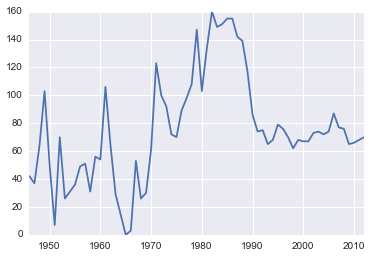

In [163]:
df.groupby(df.date.dt.year).unres.nunique().plot()

In [152]:
df.groupby(['date', 'unres'])

,rcid,session,date,unres,vote,uniquename
0,3,1,1946-01-01,R/1/66,1,United States of America
1,3,1,1946-01-01,R/1/66,3,Canada
2,3,1,1946-01-01,R/1/66,9,Bahamas
3,3,1,1946-01-01,R/1/66,1,Cuba
4,3,1,1946-01-01,R/1/66,1,Haiti
...,...,...,...,...,...,...
1024534,9056,22,1967-07-05,ESS/5/100,9,Nauru
1024535,9056,22,1967-07-05,ESS/5/100,9,Marshall Islands
1024536,9056,22,1967-07-05,ESS/5/100,9,Palau
1024537,9056,22,1967-07-05,ESS/5/100,9,"Micronesia, Federated States of"


In [138]:
df.head()

,rcid,session,date,unres,vote,uniquename
0,3,1,1946-01-01,R/1/66,1,United States of America
1,3,1,1946-01-01,R/1/66,3,Canada
2,3,1,1946-01-01,R/1/66,9,Bahamas
3,3,1,1946-01-01,R/1/66,1,Cuba
4,3,1,1946-01-01,R/1/66,1,Haiti


In [164]:
desc

,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec
0,1,3,4,29,18,NaN,1946-01-01,R/1/66,1,0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0
1,1,4,8,9,34,NaN,1946-01-02,R/1/79,0,0,SECURITY COUNCIL ELECTIONS,TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...,0,0,0,0,0,0
2,1,5,1,28,22,NaN,1946-01-04,R/1/98,0,0,VOTING PROCEDURE,TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALL...,0,0,0,0,0,0
3,1,6,10,12,27,NaN,1946-01-04,R/1/107,0,0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,0,0,0,1,0,0
4,1,7,0,25,18,NaN,1946-01-02,R/1/295,1,0,GENERAL ASSEMBLY ELECTIONS,TO ADOPT A 6TH COMMITTEE AMENDMENT (A/14) TO T...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,22,9052,2,116,0,NaN,1967-07-02,ESS/5/101,0,0,"ISRAEL, UNRWA",TO ADOPT DRAFT RESOL. (A/L.526/ADD.3) WELCOMIN...,1,0,0,0,0,0
5206,22,9053,20,99,0,NaN,1967-07-02,ESS/5/102,0,0,"JERUSALEM, STATUS",TO ADOPT DRAFT RESOL. (A/L.527/REV.1) CALLING ...,1,0,0,0,0,0
5207,22,9054,18,99,0,NaN,1967-07-05,ESS/5/41,0,0,"JERUSALEM, STATUS",TO ADOPT DRAFT RESOL. (A/528/REV.2) DEPLORING ...,1,0,0,0,0,0
5208,22,9055,27,62,27,NaN,1967-07-05,ESS/5/97,0,1,SPECIAL SESSION ADJOURNMENT,TO ADOPT OPERATIVE PARAG. 1 OF DRAFT RESOL. (A...,0,0,0,0,0,0
